# Text Mining 전처리 실습

## NLP
: 파이썬 기반 텍스트 분석 패키지 (주로 영어권 사용)

cf. 한글 Text Mining은 koNLPy 한글 형태소 분석 패키지를 쓰는 것이 좋다. 

* 텍스트 마이닝 과정
![텍스트마이닝과정](https://i.ibb.co/dQpHNzw/image.png|)


* 전처리 세부 과정

    1. Load text
    2. Tokenize text (ex: stemming, morph analyzing)
    3. Tag tokens (ex: POS, NER)
    4. Token(Feature) selection and/or filter/rank tokens (ex: stopword removal, TF-IDF)
    5. ...and so on (ex: calculate word/document similarities, cluster documents)

## Useful Python Packages for Text Mining and NLP
* NLTK : Provides modules for text analysis (mostly language independent)
* koNLPy: Provides modules for Korean text analysis

### NLTK로 영어 텍스트마이닝 전처리 실습 해보기.

### 1. 크롤링으로 수집한 빌보드 핫 100 가사 top10 데이터

In [1]:
import nltk
lyrics = open('billboardlyrics.txt').read()

### 2. 토큰화
문서를 토큰으로 나누는 방법은 다양하다. 

In [2]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(lyrics)
print(tokenized_text)

['I said, certified freak\nSeven days a week\nWet ass pussy\nMake that pull-out game weak, woo\nYeah, yeah, yeah, yeah\nYeah, you fucking with some wet ass pussy\nBring a bucket and a mop for this wet ass pussy\nGive me everything you got for this wet ass pussy\nBeat it up, nigga, catch a charge\nExtra large and extra hard\nPut this pussy right in your face\nSwipe your nose like a credit card\nHop on top, I wanna ride\nI do a kegel while it\'s inside\nSpit in my mouth, look in my eyes\nThis pussy is wet, come take a dive\nTie me up like I\'m surprised\nLet\'s role play, I wear a disguise\nI want you to park that big Mack truck\nRight in this little garage\nMake it cream, make me scream\nOut in public, make a scene\nI don\'t cook, I don\'t clean\nBut let me tell you how I got this ring (ayy, ayy)\nGobble me, swallow me, drip down inside of me\nQuick jump out \'fore you let it get inside of me\nI tell him where to put it, never tell him where I\'m \'bout to be\nI run down on him \'fore I

In [4]:
# Word Tokenization
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(lyrics)
print(tokenized_word)

['I', 'said', ',', 'certified', 'freak', 'Seven', 'days', 'a', 'week', 'Wet', 'ass', 'pussy', 'Make', 'that', 'pull-out', 'game', 'weak', ',', 'woo', 'Yeah', ',', 'yeah', ',', 'yeah', ',', 'yeah', 'Yeah', ',', 'you', 'fucking', 'with', 'some', 'wet', 'ass', 'pussy', 'Bring', 'a', 'bucket', 'and', 'a', 'mop', 'for', 'this', 'wet', 'ass', 'pussy', 'Give', 'me', 'everything', 'you', 'got', 'for', 'this', 'wet', 'ass', 'pussy', 'Beat', 'it', 'up', ',', 'nigga', ',', 'catch', 'a', 'charge', 'Extra', 'large', 'and', 'extra', 'hard', 'Put', 'this', 'pussy', 'right', 'in', 'your', 'face', 'Swipe', 'your', 'nose', 'like', 'a', 'credit', 'card', 'Hop', 'on', 'top', ',', 'I', 'wan', 'na', 'ride', 'I', 'do', 'a', 'kegel', 'while', 'it', "'s", 'inside', 'Spit', 'in', 'my', 'mouth', ',', 'look', 'in', 'my', 'eyes', 'This', 'pussy', 'is', 'wet', ',', 'come', 'take', 'a', 'dive', 'Tie', 'me', 'up', 'like', 'I', "'m", 'surprised', 'Let', "'s", 'role', 'play', ',', 'I', 'wear', 'a', 'disguise', 'I', 'wa

In [ ]:
from nltk import regexp_tokenize
pattern = r'''(?x) ([A-Z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
tokens_en = regexp_tokenize(lyrics, pattern)

In [5]:
# Frequency Distribution

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 936 samples and 4975 outcomes>


In [7]:
fdist.most_common(50) # 빈도수 많은 것 상위 50개 뽑기.

[(',', 307),
 ('I', 250),
 ('a', 119),
 ('you', 98),
 ('the', 94),
 ('it', 86),
 ("'", 82),
 ('(', 75),
 (')', 75),
 ("n't", 71),
 ('and', 68),
 ('to', 60),
 ('in', 59),
 ('that', 56),
 ('me', 55),
 ('on', 52),
 ('your', 51),
 ('do', 49),
 ('like', 48),
 ("'s", 47),
 ('my', 46),
 ("'m", 46),
 ('just', 34),
 ('this', 33),
 ('up', 31),
 ('?', 29),
 ('they', 28),
 ('go', 27),
 ('sugar', 27),
 ('got', 26),
 ('know', 26),
 ('Watermelon', 25),
 ('be', 24),
 ('all', 24),
 ('ayy', 23),
 ('high', 23),
 ('na', 22),
 ('could', 22),
 ('we', 22),
 ('make', 21),
 ('ai', 21),
 ('yeah', 20),
 ('of', 20),
 ('And', 20),
 ('baby', 20),
 ('with', 19),
 ('But', 19),
 ('We', 19),
 ('wan', 18),
 ('gon', 18)]

* 빈도수 그래프 만들기

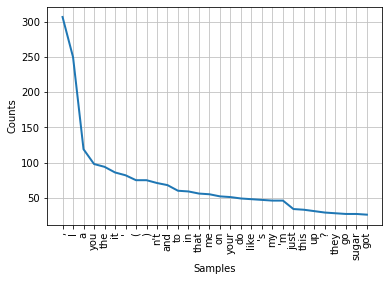

In [8]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### 3. Stopwords (불용어 처리)
텍스트에는 is, am, are, this, a, an, the 등과 같은 불용어가 포함될 수 있다. 

불용어 제거를위한 NLTK에서 불용어 목록을 만들고 이러한 단어에서 토큰 목록을 필터링해야 한다.

In [17]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words) # 영어 불용어 리스트 보기

{'then', 'was', 'other', 'up', 'can', 'its', 'more', 'did', 'hadn', "isn't", "haven't", 'doing', 'yourself', 'most', 'won', 'while', 'she', 'ours', 's', 'myself', 'them', 'am', 'all', 'needn', "you're", 'm', 'our', 'under', 'not', 'yourselves', 'or', 'an', 'just', 'by', 'down', 'in', "won't", 'shouldn', 'are', 'this', 'be', "wouldn't", 'ourselves', 'whom', 'such', 'when', 'it', 'i', "didn't", 'we', 'haven', "shouldn't", 'own', 'into', 'isn', 'mightn', "that'll", 'at', 'her', 'me', 'having', 'why', "aren't", 'some', 'only', 'have', 'which', 'above', 'of', "you've", 'if', 'is', 'after', 'to', 'where', 'that', 'wasn', 'against', 'should', 'been', "should've", 'themselves', 'same', 'will', 'aren', 'don', 'until', "mustn't", 'wouldn', 'yours', 'herself', 'any', 'you', 'again', 'now', "hadn't", 'll', 'd', "needn't", 'on', 'off', 'during', "mightn't", 'these', "don't", 'his', 'over', 'y', 'because', 'how', 'than', 'about', 'had', 'between', 'my', 'couldn', 'didn', 'few', 'a', 'doesn', "couldn

* 불용어 지우기

In [21]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_word)

Tokenized Sentence: ['I', 'said', ',', 'certified', 'freak', 'Seven', 'days', 'a', 'week', 'Wet', 'ass', 'pussy', 'Make', 'that', 'pull-out', 'game', 'weak', ',', 'woo', 'Yeah', ',', 'yeah', ',', 'yeah', ',', 'yeah', 'Yeah', ',', 'you', 'fucking', 'with', 'some', 'wet', 'ass', 'pussy', 'Bring', 'a', 'bucket', 'and', 'a', 'mop', 'for', 'this', 'wet', 'ass', 'pussy', 'Give', 'me', 'everything', 'you', 'got', 'for', 'this', 'wet', 'ass', 'pussy', 'Beat', 'it', 'up', ',', 'nigga', ',', 'catch', 'a', 'charge', 'Extra', 'large', 'and', 'extra', 'hard', 'Put', 'this', 'pussy', 'right', 'in', 'your', 'face', 'Swipe', 'your', 'nose', 'like', 'a', 'credit', 'card', 'Hop', 'on', 'top', ',', 'I', 'wan', 'na', 'ride', 'I', 'do', 'a', 'kegel', 'while', 'it', "'s", 'inside', 'Spit', 'in', 'my', 'mouth', ',', 'look', 'in', 'my', 'eyes', 'This', 'pussy', 'is', 'wet', ',', 'come', 'take', 'a', 'dive', 'Tie', 'me', 'up', 'like', 'I', "'m", 'surprised', 'Let', "'s", 'role', 'play', ',', 'I', 'wear', 'a', 

NameError: name 'filtered_word' is not defined

### 4. Stemming (어간추출)
원형 단어를 찾은 방법 중 하나로, 다른 하나는 lemmatization이 있다. 

stemming: 원형 단어로 변환시 lemmatization 일반적인 방법을 적용하거나 더 단순화된 방법을 사용한다.

해당 실습에서는 stemming을 이용하겠다. 

In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)

Filtered Sentence: ['I', 'said', ',', 'certified', 'freak', 'Seven', 'days', 'week', 'Wet', 'ass', 'pussy', 'Make', 'pull-out', 'game', 'weak', ',', 'woo', 'Yeah', ',', 'yeah', ',', 'yeah', ',', 'yeah', 'Yeah', ',', 'fucking', 'wet', 'ass', 'pussy', 'Bring', 'bucket', 'mop', 'wet', 'ass', 'pussy', 'Give', 'everything', 'got', 'wet', 'ass', 'pussy', 'Beat', ',', 'nigga', ',', 'catch', 'charge', 'Extra', 'large', 'extra', 'hard', 'Put', 'pussy', 'right', 'face', 'Swipe', 'nose', 'like', 'credit', 'card', 'Hop', 'top', ',', 'I', 'wan', 'na', 'ride', 'I', 'kegel', "'s", 'inside', 'Spit', 'mouth', ',', 'look', 'eyes', 'This', 'pussy', 'wet', ',', 'come', 'take', 'dive', 'Tie', 'like', 'I', "'m", 'surprised', 'Let', "'s", 'role', 'play', ',', 'I', 'wear', 'disguise', 'I', 'want', 'park', 'big', 'Mack', 'truck', 'Right', 'little', 'garage', 'Make', 'cream', ',', 'make', 'scream', 'Out', 'public', ',', 'make', 'scene', 'I', "n't", 'cook', ',', 'I', "n't", 'clean', 'But', 'let', 'tell', 'I', 'g

In [25]:
print("Stemmed Sentence:",stemmed_words) #어간만 추출된 것을 알 수 있다. 

Stemmed Sentence: ['I', 'said', ',', 'certifi', 'freak', 'seven', 'day', 'week', 'wet', 'ass', 'pussi', 'make', 'pull-out', 'game', 'weak', ',', 'woo', 'yeah', ',', 'yeah', ',', 'yeah', ',', 'yeah', 'yeah', ',', 'fuck', 'wet', 'ass', 'pussi', 'bring', 'bucket', 'mop', 'wet', 'ass', 'pussi', 'give', 'everyth', 'got', 'wet', 'ass', 'pussi', 'beat', ',', 'nigga', ',', 'catch', 'charg', 'extra', 'larg', 'extra', 'hard', 'put', 'pussi', 'right', 'face', 'swipe', 'nose', 'like', 'credit', 'card', 'hop', 'top', ',', 'I', 'wan', 'na', 'ride', 'I', 'kegel', "'s", 'insid', 'spit', 'mouth', ',', 'look', 'eye', 'thi', 'pussi', 'wet', ',', 'come', 'take', 'dive', 'tie', 'like', 'I', "'m", 'surpris', 'let', "'s", 'role', 'play', ',', 'I', 'wear', 'disguis', 'I', 'want', 'park', 'big', 'mack', 'truck', 'right', 'littl', 'garag', 'make', 'cream', ',', 'make', 'scream', 'out', 'public', ',', 'make', 'scene', 'I', "n't", 'cook', ',', 'I', "n't", 'clean', 'but', 'let', 'tell', 'I', 'got', 'ring', '(', 'a